# Problem Definition
The focus of this project will be the Sonar Mines vs Rocks dataset1. The problem is to predict metal or rock objects from sonar return data. Each pattern is a set of 60 numbers in the range 0.0 to 1.0. Each number represents the energy within a particular frequency band, integrated over a certain period of time. The label associated with each record contains the letter R if the object is a rock and M if it is a mine (metal cylinder). The numbers in the labels are in increasing order of aspect angle, but they do not encode the angle directly.

In [1]:
'''
Load the Dataset
Let’s start off by loading the libraries required for this project.
'''
# Load libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier


In [3]:
# Load dataset
url = 'sonar.all-data.csv'
df = pd.read_csv(url, header=None)

In [4]:
# Analyze Data

#Shape
df.shape

(208, 61)

In [5]:
# the info of the data type, null values
set_option('display.max_rows', 500)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

##### from the result, it shows that the features are numeric while the class value is object

In [16]:
# check the data to see if there are any missing data
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
55    0
56    0
57    0
58    0
59    0
60    0
dtype: int64

 ##### The result show no missing value in data

In [8]:
#view the first 10 instances
#head
set_option('display.width', 100)
df.head(10)

#df.tail(10)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
5,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
6,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,R
7,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,...,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053,R
8,0.0223,0.0375,0.0484,0.0475,0.0647,0.0591,0.0753,0.0098,0.0684,0.1487,...,0.0145,0.0128,0.0145,0.0058,0.0049,0.0065,0.0093,0.0059,0.0022,R
9,0.0164,0.0173,0.0347,0.0070,0.0187,0.0671,0.1056,0.0697,0.0962,0.0251,...,0.0090,0.0223,0.0179,0.0084,0.0068,0.0032,0.0035,0.0056,0.0040,R


#### from the result it show the data are of same scale 

In [11]:
# statistical summary
set_option('display.precision',3)
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000,2.080e+02,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,...,208.000,2.080e+02,2.080e+02,208.000,2.080e+02,2.080e+02,2.080e+02,2.080e+02,2.080e+02,2.080e+02
mean,0.029,3.844e-02,0.044,0.054,0.075,0.105,0.122,0.135,0.178,0.208,...,0.016,1.342e-02,1.071e-02,0.011,9.290e-03,8.222e-03,7.820e-03,7.949e-03,7.941e-03,6.507e-03
std,0.023,3.296e-02,0.038,0.047,0.056,0.059,0.062,0.085,0.118,0.134,...,0.012,9.634e-03,7.060e-03,0.007,7.088e-03,5.736e-03,5.785e-03,6.470e-03,6.181e-03,5.031e-03
min,0.002,6.000e-04,0.002,0.006,0.007,0.010,0.003,0.005,0.007,0.011,...,0.000,8.000e-04,5.000e-04,0.001,6.000e-04,4.000e-04,3.000e-04,3.000e-04,1.000e-04,6.000e-04
25%,0.013,1.645e-02,0.019,0.024,0.038,0.067,0.081,0.080,0.097,0.111,...,0.008,7.275e-03,5.075e-03,0.005,4.150e-03,4.400e-03,3.700e-03,3.600e-03,3.675e-03,3.100e-03
50%,0.023,3.080e-02,0.034,0.044,0.062,0.092,0.107,0.112,0.152,0.182,...,0.014,1.140e-02,9.550e-03,0.009,7.500e-03,6.850e-03,5.950e-03,5.800e-03,6.400e-03,5.300e-03
75%,0.036,4.795e-02,0.058,0.065,0.100,0.134,0.154,0.170,0.233,0.269,...,0.021,1.673e-02,1.490e-02,0.015,1.210e-02,1.058e-02,1.043e-02,1.035e-02,1.033e-02,8.525e-03
max,0.137,2.339e-01,0.306,0.426,0.401,0.382,0.373,0.459,0.683,0.711,...,0.100,7.090e-02,3.900e-02,0.035,4.470e-02,3.940e-02,3.550e-02,4.400e-02,3.640e-02,4.390e-02


#### Again, as we expect, the data has the same range, but interestingly differing mean values. There may be some benefit from standardizing the data.

In [12]:
# Class distribution
df.groupby(60).size()

60
M    111
R     97
dtype: int64

#### The class distribution show a reasonably balance class

## Unimodal Data Visualizations

<Axes: xlabel='60'>

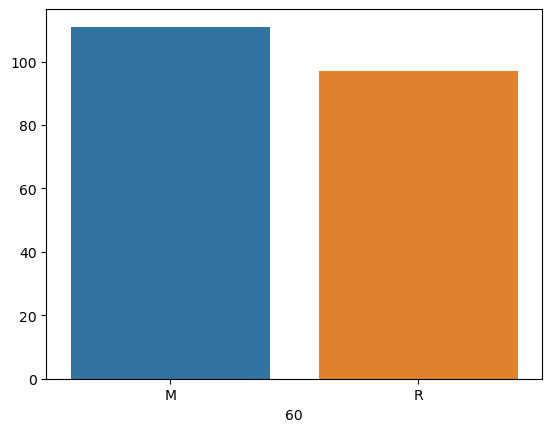

In [19]:
# show each distribution by class
df1 = df.groupby(60).size()

sns.barplot(x = df1.index, y = df1.values)

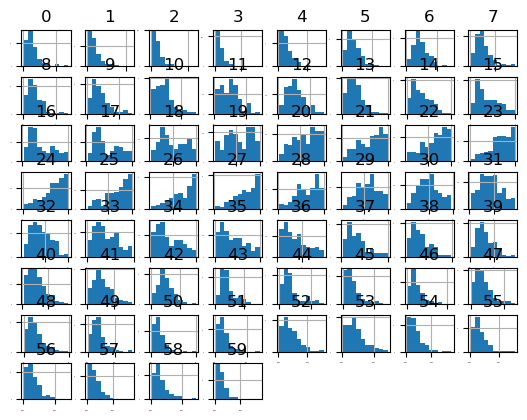

In [22]:
# peeking through each columns
df.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
plt.show()

We can see that there are a lot of Gaussian-like distributions and perhaps some exponentiallike
distributions for other attributes.

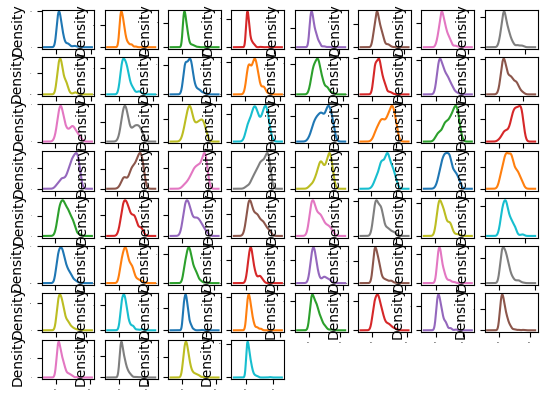

In [23]:
#peeking through each attribut in the data from a different perspective
# density
df.plot(kind='density', subplots=True, layout=(8,8), sharex=False, legend=False,
    fontsize=1)
plt.show()

the result show alot of attribute have a skewed distribution. A power transform like
the Box-Cox transfrom to correct show skew in the distributions might be useful

## Multimodal Data Visualizations

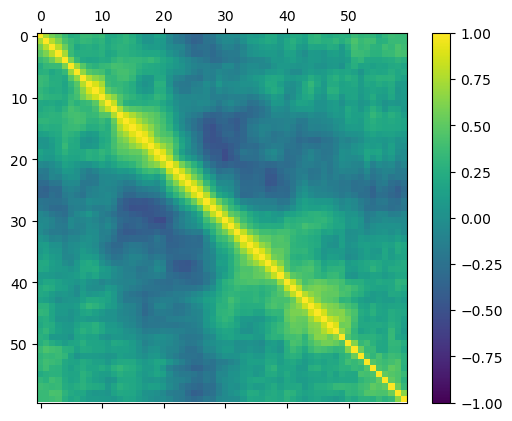

In [32]:
# Visualizing the relationship between each attribute using Correlation matrix
# correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(df.loc[:,0:59].corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
plt.show()

In [35]:
corr = df.loc[:,0:59].corr()
corr.style.background_gradient(cmap='coolwarm')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,1.000000,0.735896,0.571537,0.491438,0.344797,0.238921,0.260815,0.355523,0.353420,0.318276,0.344058,0.210861,0.210722,0.256278,0.304878,0.239079,0.137845,0.041817,0.055227,0.156760,0.117663,-0.056973,-0.163426,-0.218093,-0.295683,-0.342865,-0.341703,-0.224340,-0.199099,-0.077430,-0.048370,-0.030444,-0.031939,0.031319,0.098118,0.080722,0.119565,0.209873,0.208371,0.099993,0.127313,0.213592,0.206057,0.157949,0.279968,0.319354,0.230343,0.203234,0.247560,0.269287,0.254450,0.355299,0.311729,0.322299,0.312067,0.220642,0.313725,0.368132,0.357116,0.347078
1,0.735896,1.000000,0.779916,0.606684,0.419669,0.332329,0.279040,0.334615,0.316733,0.270782,0.297065,0.194102,0.249596,0.273170,0.307599,0.261844,0.152170,0.042870,0.040911,0.102428,0.075255,-0.074157,-0.179365,-0.196469,-0.295302,-0.365749,-0.337046,-0.234386,-0.228490,-0.115301,-0.055862,-0.049683,-0.108272,-0.004247,0.115824,0.132611,0.169186,0.217494,0.186828,0.098350,0.188226,0.261345,0.186368,0.133018,0.285716,0.304247,0.255797,0.265279,0.313995,0.245868,0.320538,0.434548,0.346076,0.383960,0.380165,0.262263,0.280341,0.353042,0.352200,0.358761
2,0.571537,0.779916,1.000000,0.781786,0.546141,0.346275,0.190434,0.237884,0.252691,0.219637,0.274610,0.214807,0.258767,0.291724,0.285663,0.237017,0.201093,0.120587,0.099303,0.103117,0.063990,-0.026815,-0.073400,-0.085380,-0.214256,-0.291974,-0.263111,-0.256674,-0.290728,-0.197493,-0.106198,-0.109895,-0.170671,-0.099409,0.017053,0.053070,0.107530,0.130276,0.110499,0.074137,0.189047,0.233442,0.113920,0.071946,0.180734,0.173649,0.179528,0.234896,0.223074,0.081096,0.238110,0.394076,0.332914,0.367186,0.289731,0.287661,0.380819,0.334108,0.425047,0.373948
3,0.491438,0.606684,0.781786,1.000000,0.726943,0.352805,0.246440,0.246742,0.247078,0.237769,0.271881,0.175381,0.215754,0.286708,0.278529,0.248245,0.223203,0.194992,0.189405,0.188317,0.142271,0.036010,-0.029749,-0.102975,-0.206673,-0.291357,-0.294749,-0.256074,-0.300476,-0.236602,-0.190086,-0.169987,-0.164651,-0.083965,0.015200,0.039282,0.063486,0.089887,0.089346,0.045141,0.145241,0.144693,0.050629,-0.008407,0.087824,0.080012,0.046109,0.121065,0.133294,0.077925,0.174676,0.374651,0.364772,0.334211,0.284955,0.280938,0.340254,0.344865,0.420266,0.400626
4,0.344797,0.419669,0.546141,0.726943,1.000000,0.597053,0.335422,0.204006,0.177906,0.183219,0.231684,0.211657,0.299086,0.359062,0.318059,0.328725,0.326477,0.299266,0.340543,0.285737,0.205088,0.152897,0.073934,-0.000624,-0.067296,-0.125675,-0.169618,-0.214692,-0.283863,-0.273350,-0.214336,-0.173485,-0.200586,-0.140559,-0.086529,-0.073481,-0.064617,-0.008620,0.063408,0.061616,0.098832,0.125181,0.063706,0.031575,0.089202,0.081964,0.041419,0.084435,0.088128,0.066751,0.115936,0.266617,0.314985,0.205306,0.196472,0.199323,0.219395,0.238793,0.290982,0.253710
5,0.238921,0.332329,0.346275,0.352805,0.597053,1.000000,0.702889,0.471683,0.327578,0.288621,0.333570,0.344451,0.411107,0.396233,0.367908,0.353783,0.293190,0.235778,0.226305,0.206841,0.174768,0.123770,0.064081,0.027026,-0.043280,-0.100309,-0.129094,-0.118645,-0.156081,-0.151186,-0.054136,-0.051934,-0.144391,-0.070337,-0.028815,-0.023621,-0.064798,-0.048745,0.030599,0.081119,0.075797,0.048763,0.034380,0.048870,0.085468,0.029524,0.016640,0.067196,0.080729,0.017300,0.171767,0.252288,0.162404,0.164073,0.133464,0.166758,0.161333,0.203986,0.220573,0.178158
6,0.260815,0.279040,0.190434,0.246440,0.335422,0.702889,1.000000,0.675774,0.470580,0.425448,0.396588,0.274432,0.365391,0.409576,0.411692,0.363086,0.250024,0.208057,0.215495,0.196496,0.165827,0.063773,0.009359,0.011982,-0.057147,-0.126074,-0.179526,-0.116848,-0.129694,-0.068142,-0.096945,-0.115871,-0.127052,-0.077662,-0.015531,0.002979,-0.001376,0.065900,0.080942,0.112673,0.041071,-0.028720,-0.025727,0.061404,0.110813,0.076537,0.098925,0.155221,0.194720,0.166112,0.184152,0.144051,0.046403,0.16

It looks like there is also some structure in the order of the attributes. The red around
the diagonal suggests that attributes that are next to each other are generally more correlated
with each other. The blue patches also suggest some moderate negative correlation the further
attributes are away from each other in the ordering. This makes sense if the order of the
attributes refers to the angle of sensors for the sonar chirp.

### Evaluation Algorithm

##### Validation Dataset

It is a good idea to use a validation hold-out set. This is a sample of the data that we hold
back from our analysis and modeling. We use it right at the end of our project to confirm the
accuracy of our final model. It is a smoke test that we can use to see if we messed up and to
give us confidence on our estimates of accuracy on unseen data. We will use 80% of the dataset
for modeling and hold back 20% for validation.

In [37]:
# Split-out validation dataset
array = df.values
X = array[:,0:60].astype(float)
Y = array[:,60]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
    test_size=validation_size, random_state=seed)

## Evaluate Algorithms: Baseline

We don’t know what algorithms will do well on this dataset. Gut feel suggests distance based
algorithms like k-Nearest Neighbors and Support Vector Machines may do well. Let’s design
our test harness. We will use 10-fold cross-validation. The dataset is not too small and this is
a good standard test harness configuration. We will evaluate algorithms using the accuracy
metric. This is a gross metric that will give a quick idea of how correct a given model is, and is
more useful on binary classification problems like this one.

In [39]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'

Let’s create a baseline of performance on this problem and spot-check a number of different
algorithms. We will select a suite of different algorithms capable of working on this classification
problem. The six algorithms selected include:

• Linear Algorithms: Logistic Regression (LR) and Linear Discriminant Analysis (LDA).

• Nonlinear Algorithms: Classification and Regression Trees (CART), Support Vector
Machines (SVM), Gaussian Naive Bayes (NB) and k-Nearest Neighbors (KNN).

In [40]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

The algorithms all use default tuning parameters. Let’s compare the algorithms. We will
display the mean and standard deviation of accuracy for each algorithm as we calculate it and
collect the results for use later.

In [41]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.759926 (0.091145)
LDA: 0.778676 (0.093570)
KNN: 0.758824 (0.106417)
CART: 0.739706 (0.085998)
NB: 0.682721 (0.136040)
SVM: 0.565809 (0.141326)


Running the example provides the output below. The results suggest That LinearDiscriminantAnalysis,  Logistic
Regression, and k-Nearest Neighbors may be worth further study.

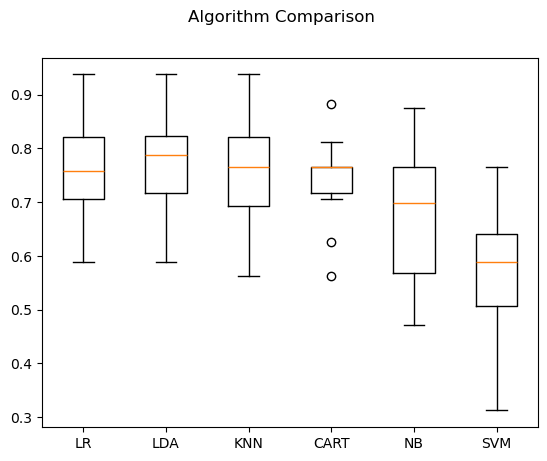

In [43]:
# Compare Algorithms the performance of algorithm graphically using box and whisker
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

The results show a tight distribution for CART which is encouraging, suggesting low variance.
The poor results for SVM are surprising.

It is possible that the varied distribution of the attributes is having an effect on the accuracy
of algorithms such as SVM. In the next section we will repeat this spot-check with a standardized
copy of the training dataset.

## Evaluate Algorithms: Standardize Data

We suspect that the differing distributions of the raw data may be negatively impacting the skill
of some of the algorithms. Let’s evaluate the same algorithms with a standardized copy of the
dataset. This is where the data is transformed such that each attribute has a mean value of zero
and a standard deviation of one. We also need to avoid data leakage when we transform the
data. A good way to avoid leakage is to use pipelines that standardize the data and build the
model for each fold in the cross-validation test harness. That way we can get a fair estimation
of how each model with standardized data might perform on unseen data.

In [44]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
    LogisticRegression(solver='liblinear'))])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA',
    LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
    KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
    DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB',
    GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM',
    SVC(gamma='auto'))])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.754412 (0.067926)
ScaledLDA: 0.778676 (0.093570)
ScaledKNN: 0.808456 (0.107996)
ScaledCART: 0.757353 (0.113233)
ScaledNB: 0.682721 (0.136040)
ScaledSVM: 0.826103 (0.081814)


Running the example provides the results listed below. We can see that KNN is still doing
well, even better than before. We can also see that the standardization of the data has lifted
the skill of SVM to be the most accurate algorithm tested so far.

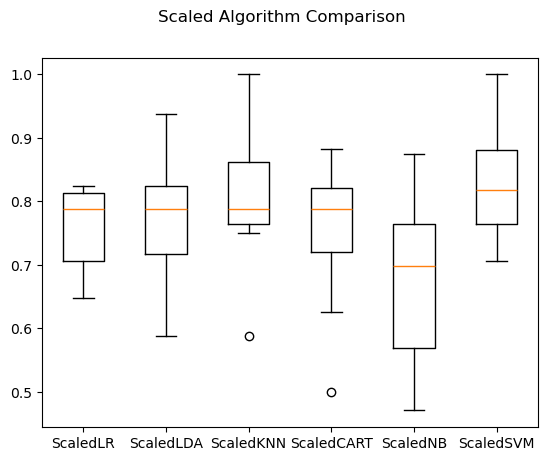

In [45]:
# Compare the Scaled Algorithms 
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

The results suggest digging deeper into the SVM and KNN algorithms. It is very likely that
configuration beyond the default may yield even more accurate models.

## Algorithm Tuning
In this section we investigate tuning the parameters for two algorithms that show promise from
the spot-checking in the previous section: KNN and SVM.

#### Tuning KNN
We can start off by tuning the number of neighbors for KNN. The default number of neighbors
is 7. Below we try all odd values of k from 1 to 21, covering the default value of 7. Each k value
is evaluated using 10-fold cross-validation on the training standardized dataset.

In [46]:
# Tune scaled KNN
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.836029 using {'n_neighbors': 1}
0.836029 (0.079487) with: {'n_neighbors': 1}
0.813603 (0.088021) with: {'n_neighbors': 3}
0.814338 (0.096870) with: {'n_neighbors': 5}
0.777574 (0.120387) with: {'n_neighbors': 7}
0.730147 (0.099376) with: {'n_neighbors': 9}
0.741544 (0.073970) with: {'n_neighbors': 11}
0.710662 (0.105829) with: {'n_neighbors': 13}
0.723162 (0.080983) with: {'n_neighbors': 15}
0.698897 (0.072669) with: {'n_neighbors': 17}
0.710662 (0.091337) with: {'n_neighbors': 19}
0.698897 (0.091195) with: {'n_neighbors': 21}


We can see that the optimal configuration is K=1. This is interesting as the algorithm will
make predictions using the most similar instance in the training dataset alone.

#### Tuning SVM
We can tune two key parameters of the SVM algorithm, the value of C (how much to relax the
margin) and the type of kernel. The default for SVM (the SVC class) is to use the Radial
Basis Function (RBF) kernel with a C value set to 1.0. Like with KNN, we will perform a grid
search using 10-fold cross-validation with a standardized copy of the training dataset. We will
try a number of simpler kernel types and C values with less bias and more bias (less than and
more than 1.0 respectively).

In [47]:
# Tune scaled SVM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']

param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC(gamma='auto')
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.850735 using {'C': 2.0, 'kernel': 'poly'}
0.748529 (0.069953) with: {'C': 0.1, 'kernel': 'linear'}
0.570956 (0.131380) with: {'C': 0.1, 'kernel': 'poly'}
0.601103 (0.184435) with: {'C': 0.1, 'kernel': 'rbf'}
0.712868 (0.116579) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.754412 (0.082337) with: {'C': 0.3, 'kernel': 'linear'}
0.656618 (0.104417) with: {'C': 0.3, 'kernel': 'poly'}
0.748162 (0.085295) with: {'C': 0.3, 'kernel': 'rbf'}
0.748897 (0.078423) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.765809 (0.070336) with: {'C': 0.5, 'kernel': 'linear'}
0.704412 (0.110346) with: {'C': 0.5, 'kernel': 'poly'}
0.772426 (0.081837) with: {'C': 0.5, 'kernel': 'rbf'}
0.760662 (0.065632) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.759926 (0.083206) with: {'C': 0.7, 'kernel': 'linear'}
0.753676 (0.095135) with: {'C': 0.7, 'kernel': 'poly'}
0.814338 (0.059832) with: {'C': 0.7, 'kernel': 'rbf'}
0.766912 (0.072850) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.765441 (0.066964) with: {'C': 0.9, 'kernel': 'linear

Running the example prints out the best configuration, the accuracy as well as the accuracies
for all configuration combinations.

We can see the most accurate configuration was SVM with an RBF kernel and a C value
of 2.0. The accuracy 85.0735% is seemingly better than what KNN could achieve.


## Evaluate Algorithm: Ensemble Methods

Another way that we can improve the performance of algorithms on this problem is by using
ensemble methods. In this section we will evaluate four different ensemble machine learning
algorithms, two boosting and two bagging methods:

• Boosting Methods: AdaBoost (AB) and Gradient Boosting (GBM).
    
• Bagging Methods: Random Forests (RF) and Extra Trees (ET).
    
We will use the same test harness as before, 10-fold cross-validation. No data standardization
is used in this case because all four ensemble algorithms are based on decision trees that are
less sensitive to data distributions.

In [50]:
# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier(n_estimators=10)))
ensembles.append(('ET', ExtraTreesClassifier(n_estimators=10)))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

C:\Users\nwach\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\nwach\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\nwach\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\nwach\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\nwa

AB: 0.782721 (0.072445)
GBM: 0.790441 (0.105150)
RF: 0.808088 (0.089040)
ET: 0.795221 (0.074171)


We can see that both bagging techniques provide strong accuracy scores in the low 80s
(%) with default configurations. We can plot the distribution of accuracy scores across the
cross-validation folds

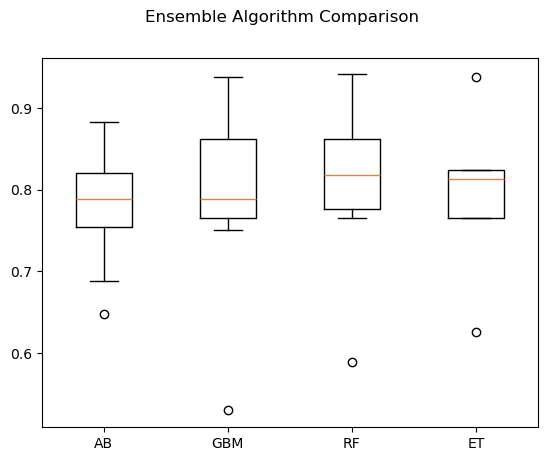

In [51]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

The results suggest RF and GBM may be worthy of further study, with a strong mean and a spread
that skews up towards high 90s (%) in accuracy.

In [53]:
# Tune scaled RF
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=np.array([50,100,150,200,250,300,350,400]))
model = RandomForestClassifier(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

In [54]:
# printing the best configuration using RF
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.856250 using {'n_estimators': 350}
0.802206 (0.108972) with: {'n_estimators': 50}
0.814706 (0.107063) with: {'n_estimators': 100}
0.826838 (0.103222) with: {'n_estimators': 150}
0.820221 (0.109808) with: {'n_estimators': 200}
0.844485 (0.099849) with: {'n_estimators': 250}
0.850368 (0.096658) with: {'n_estimators': 300}
0.856250 (0.096635) with: {'n_estimators': 350}
0.844485 (0.088847) with: {'n_estimators': 400}


We can see the most accurate configuration for the tune ensemble RF Best: 0.856250 using {'n_estimators': 350} deiveries the best result.
than the tunes SVM with an RBF kernel and a C value
of 2.0 and KNN of 0.836029 using {'n_neighbors': 1}. 

For the final model RF and SVM will be used and there result will be compared.

## Finalize Model

The RF and SVM showed the most promise as a low complexity and stable model for this problem. In
this section we will finalize the model by training it on the entire training dataset and make
predictions for the hold-out validation dataset to confirm our findings. A part of the findings was
that SVM performs better when the dataset is standardized so that all attributes have a mean
value of zero and a standard deviation of one. We can calculate this from the entire training
dataset and apply the same transform to the input attributes from the validation dataset.

In [55]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC(C=2.0)
model.fit(rescaledX, Y_train)

# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9285714285714286
[[25  2]
 [ 1 14]]
              precision    recall  f1-score   support

           M       0.96      0.93      0.94        27
           R       0.88      0.93      0.90        15

    accuracy                           0.93        42
   macro avg       0.92      0.93      0.92        42
weighted avg       0.93      0.93      0.93        42



In [56]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = RandomForestClassifier(n_estimators=350)
model.fit(rescaledX, Y_train)

# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9047619047619048
[[25  2]
 [ 2 13]]
              precision    recall  f1-score   support

           M       0.93      0.93      0.93        27
           R       0.87      0.87      0.87        15

    accuracy                           0.90        42
   macro avg       0.90      0.90      0.90        42
weighted avg       0.90      0.90      0.90        42



# Conclusion
We can see that we achieve an accuracy of nearly 93% on the held-out validation dataset. A
score that matches closely to our expectations estimated above during the tuning of SVM.

SVM predict the data with high accuracy than that of RF. 

This is means to say that the best model for the classification of sonar data is:
    Support Vector Machine